# ch14 CNN with TensorFlow
- http://pythonkim.tistory.com/56
- http://sanghyukchun.github.io/75/

## 1. Introduction
<!-- <img src="./img/cnn-016.png" align="left"> -->

CNN Model
   1. 직선적 Filter 모델
   2. 불연속적인 Image 데이터를 필터링/ 학습/ 테스트에 용이
   3. CNN 은 이미지 핵심 정보를 효과적으로 추출 (기울기, 회전, 노이즈에도 인식 가능)
      1. Convolution layer : 이미지 벡터에 filter적용 (by stride) 
      2. Pooling Layer (Subsamplig) : by 평균값/ 최댓값 </br><p></p>
<img src="./img/K-003.png" align="left" width = 700>

<img src ="./img/cnn-75-11.png" align="left"><img src = "./img/cnn-75-13.png" align="left" >

## 2. Simple Convolution Layer

### 01. 원본 이미지 만들기
- (3 x 3 x 1 ) 이미지크기 3 x 3 
- (2 x 2 x 1 ) 필터 2 x 2
- (1 x 1) 스트라이드 이동<p></p>
<img src = "./img/Lab11-CNN01.png" align = "left" width = 450>

In [1]:
%matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt

In [2]:
# 원본 이미지 만들기
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)

In [ ]:
# (이미지 갯수, 3 x 3 (array) , 칼러) 
# 이미지 shape를 출력
print(image.shape)

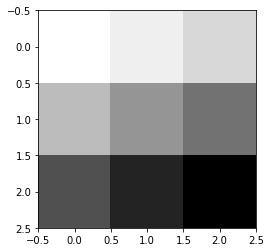

In [4]:
plt.imshow(image.reshape(3,3), cmap='Greys')

### 02. padding = "VALID"
- Data (Image)   : [ 이미지 갯수 , x , y , 칼러]
- Weight (Fiter) : [ x , y , 칼러 , 필터]
- 원본 이미지에, 2x2 filter 를 , 1 stride 간격으로 적용<p></p>
<img src = "./img/cnncode_2017-05-13.png" align= "left" width=500>

In [5]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [6]:
# Matrix 로 Image를 출력
print("imag:\n", image)  

imag:
 [[[[ 1.]
   [ 2.]
   [ 3.]]

  [[ 4.]
   [ 5.]
   [ 6.]]

  [[ 7.]
   [ 8.]
   [ 9.]]]]


In [7]:
weight = tf.constant([[[[1.]],[[1.0]]],
                     [[[1.]],[[1.]]]])
print("w(filter).shape", weight.shape)

w(filter).shape (2, 2, 1, 1)


In [8]:
# tf.nn.conv2d( 원본 이미지, Weight(filter), strides = [필터적용 stirde map 값], padding = 내용)
# strides [ 이미지갯수 , x , y , layer수]
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')  # 원소스는 padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

(1, 2, 2, 1)


tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)

- input : [batch, in_height, in_width, in_channels] 형식. 28x28x1 형식의 손글씨 이미지.
- filter : [filter_height, filter_width, in_channels, out_channels] 형식. 3, 3, 1, 32의 w.
- strides : 크기 4인 1차원 리스트. [0], [3]은 반드시 1. 일반적으로 [1], [2]는 같은 값 사용.
- padding : 'SAME' 또는 'VALID'. 패딩을 추가하는 공식의 차이. SAME은 출력 크기를 입력과 같게 유지.

3x3x1 필터를 32개 만드는 것을 코드로 표현하면 [3, 3, 1, 32]가 된다. 순서대로 너비(3), 높이(3), 입력 채널(1), 출력 채널(32)을 뜻한다. 32개의 출력이 만들어진다.

[[ 12.  16.]
 [ 24.  28.]]


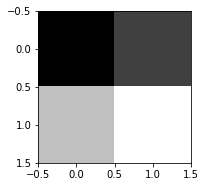

In [9]:
# reshape( Filter 적용가능한 Matrix 크기값 입력)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### 03. padding = "SAME"
- Data (Image)   : [ 이미지 갯수 , x , y , 칼러]
- Weight (Fiter) : [ x , y , 칼러 , 필터]
    1. 원본 이미지에, 2x2 filter 를 , 1 stride 간격으로 적용
    2. Zero Padding 을 이용해서 크기를 맞춘다.<p></p>
<img src = "./img/cnncode-111.png" align= "left" width=500>

In [10]:
# Matrix 로 Image를 출력
print("image.shape", image.shape)  

image.shape (1, 3, 3, 1)


In [11]:
weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print("w(filter).shape", weight.shape)

w(filter).shape (2, 2, 1, 1)


In [12]:
# strides [ 이미지갯수 , x , y , layer수]
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')  # 원소스는 padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

(1, 3, 3, 1)


In [13]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


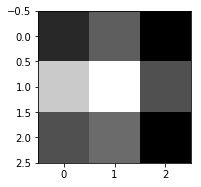

In [14]:
# reshape( 원본 이미지 크기 Matrix )
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### 04. Simple Convolution Layer 03
- Weight (Fiter) : [ x , y , 칼러 , 필터 3개 적용]

In [15]:
weight = tf.constant([[[[1.,10,-1.]],[[1.,10,-1.]]],
                     [[[1.,10,-1.]],[[1.,10,-1.]]]])
print("w(filter).shape", weight.shape)

w(filter).shape (2, 2, 1, 3)


In [16]:
# strides [ 이미지갯수 , x , y , layer수]
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')  # 원소스는 padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

(1, 3, 3, 3)


[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


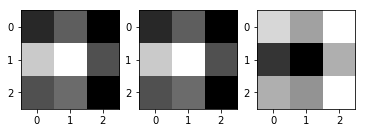

In [17]:
# reshape( 원본 이미지 크기 Matrix )
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3. Max Pooling

    CNN model은 여러 convolution layer가 결합되므로  
    공식적으로는 layer, filter를 ==> kernel이라 하고. 
    kernel들이 모임을 ==> 한 layer로 부른다.
   http://masters.donntu.org/2012/fknt/umiarov/diss/indexe.htm#p4

In [18]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
image

array([[[[ 4.],
         [ 3.]],

        [[ 2.],
         [ 1.]]]], dtype=float32)

### 01. padding = 'VALID'

In [19]:
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


### 02. padding = 'SAME'

In [20]:
# padding = 'SAME'
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


## 4. MNIST 에 CNN 적용

In [21]:
# MNIST 데이터 불러오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


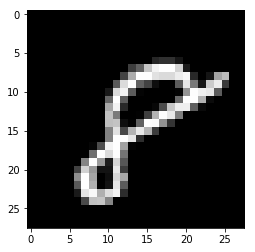

In [43]:
# mnist.train.images[0]
img = mnist.train.images[54999].reshape(28,28)
plt.imshow(img, cmap='gray')

### 01. MNIST Convolution Layer (by TensorFlow)

In [44]:
# Using TensorFlow
# Image index  : (-1번쨰 이미지, 28 x 28, 1 (color))
sess = tf.InteractiveSession()
img = img.reshape(-1,28,28,1)                                        

In [58]:
# Kernel(filter) index : ( 3 x 3 , 1(color), 5(필터갯수))
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))        
# Stride index : ( 이미지, 2 x 2 ,1(필터갯수))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 3, 3, 1], padding='SAME')  
print(conv2d)

Tensor("Conv2D_7:0", shape=(1, 10, 10, 5), dtype=float32)


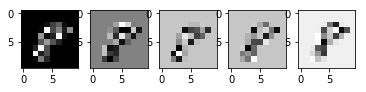

In [55]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()    # eval(파이썬명령) : 문자열로 된 파이썬 명령을 실행
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    # 5개 filter를 적용한 5개 이미지를 출력
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(10,10), cmap='gray')

### 02. MNIST Max Pooling (by TensorFlow)
- SubSampling

In [47]:
pool = tf.nn.max_pool(conv2d,                # 14 x 14원본 이미지
                      ksize=[1, 2, 2, 1],    # Kernal size
                      strides=[1, 2, 2, 1],  # 2 x 2 stride 간격 ==> Image는 7 x 7 로 출력
                      padding='SAME')
print(pool)

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


In [48]:
sess.run(tf.global_variables_initializer())

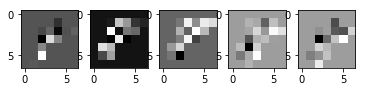

In [49]:
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

### 03. Simple CNN 
 - MNIST (99% 인식률에 도전!!)
 - Conv : 2개를 생성 
 - FC 로 마무리 <p></p>
<img src = "./img/Lab11-CNN-33.png" align = "left" width = 700 >

- Using TensorBoard : http://222.110.23.116:6060/
- http://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter

In [1]:
import tensorflow as tf
import random
tf.set_random_seed(777)  # reproducibility

#### 1) Parameter

In [2]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
#training_epochs = 15
batch_size = 100

In [3]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784]) 
Y = tf.placeholder(tf.float32, [None, 10])

In [4]:
# img 28x28x1 (black/white)
X_img = tf.reshape(X, [-1, 28, 28, 1])

#### 2-1) Conv 01

In [5]:
# L1 ImgIn shape = (?, 28, 28, 1)
#  Conv & ReLU   -> (?, 28, 28, 32)
#  Pool(2x2 stride) -> (?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  # [ 3 x 3 , 1color, 32개 필터를 활용] : shape의 크기 값
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
# Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
# Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
# Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)

#### 2-2) Conv 02

In [6]:
# L2 ImgIn shape = (?, 14, 14, 32)
#    Conv & ReLU -> (?, 14, 14, 64)
#    Pool        -> (?, 7, 7, 64)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
#Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
#Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)

#### 3) Fully Connected

In [7]:
# Final Fully Connected
# 최종 연결갯수가 3,136개 
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])          
#Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],  # 3,136개 , 0~ 9의 숫자샘플 
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

In [8]:
# logits = Hypothesis
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [9]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
# Loading MNIST Tensor  ---------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.358514333
Epoch: 0002 cost = 0.098211916
Epoch: 0003 cost = 0.070238326
Epoch: 0004 cost = 0.055822760
Epoch: 0005 cost = 0.047655358
Epoch: 0006 cost = 0.041374029
Epoch: 0007 cost = 0.035603068
Epoch: 0008 cost = 0.031854277
Epoch: 0009 cost = 0.027453821
Epoch: 0010 cost = 0.024067590
Epoch: 0011 cost = 0.021877891
Epoch: 0012 cost = 0.019538247
Epoch: 0013 cost = 0.016187267
Epoch: 0014 cost = 0.014127988
Epoch: 0015 cost = 0.013200664
Learning Finished!


In [12]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
                                        X: mnist.test.images, 
                                        Y: mnist.test.labels}))

Accuracy: 0.9888


In [13]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={
                                                        X: mnist.test.images[r:r + 1]}))

Label:  [0]
Prediction:  [0]


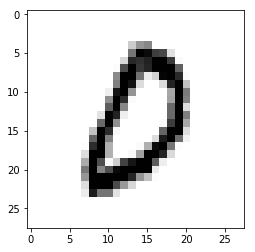

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [15]:
sess.close()

### 04. Deep CNN  
 - Conv : 3개를 생성 
 - FC   : 2개로 마무리 <p></p>
<img src = "./img/Lab11-CNN-333.png" align = "left" width = 700 >

In [16]:
import tensorflow as tf
import random
tf.set_random_seed(777)  # reproducibility

In [17]:
# 조절변수 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100
# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [18]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)

In [19]:
# L1 ImgIn shape=(?, 28, 28, 1)
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
# Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
# Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
# Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
# Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)

In [20]:
# L2 ImgIn shape=(?, 14, 14, 32)
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
# Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
# Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
# Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
# Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)

In [21]:
# L3 ImgIn shape=(?, 7, 7, 64)
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
# Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
# Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
# Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
# Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
# Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)

In [22]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
# Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
# Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)

In [23]:
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
# Tensor("add_1:0", shape=(?, 10), dtype=float32)

In [24]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [25]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
# Loading MNIST Tensor  ---------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [27]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')
# Epoch: 0015 cost = 0.024607201
# Learning Finished!

Learning started. It takes sometime.
Epoch: 0001 cost = 0.446621409
Epoch: 0002 cost = 0.095134634
Epoch: 0003 cost = 0.071754983
Epoch: 0004 cost = 0.058670053
Epoch: 0005 cost = 0.049495068
Epoch: 0006 cost = 0.043176698
Epoch: 0007 cost = 0.041006172
Epoch: 0008 cost = 0.037053994
Epoch: 0009 cost = 0.035015218
Epoch: 0010 cost = 0.032333927
Epoch: 0011 cost = 0.029966081
Epoch: 0012 cost = 0.030528397
Epoch: 0013 cost = 0.028782672
Epoch: 0014 cost = 0.025811749
Epoch: 0015 cost = 0.025037776
Learning Finished!


In [28]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
# Accuracy: 0.9938

Accuracy: 0.9932


In [29]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

Label:  [3]
Prediction:  [3]


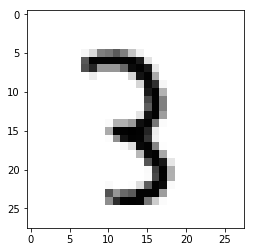

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

## 5. Python 응용

### 01. Class 모듈 활용
<img src = "./img/Lab11-CNN-class.png" align = "left" >

In [31]:
# Class를 통한 사용자함수를 정리
import time; t1 = int(time.time())
%run ./Lecture/lab-11-3-mnist_cnn_class.py
print((int(time.time())-t1)//60,'min',(int(time.time())-t1)%60,'sec')

ERROR:root:File `'./Lecture/lab-11-3-mnist_cnn_class.py'` not found.


0 min 0 sec


### 02. TensorFlow.Layers 
- High Level APIs
    1. Kernel, Pooling Stride 값은 4개 이상 List여야만 하지만, 간단한 index 2개 값만 입력
    2. Drop Out 옵션도 Training 여부 옵션을 지정가능
    3. tf.layers.dense(  unit = 마지막 layer 연결갯수 숫자를 지정)<p></p>
<img src = "./img/Lab11-CNN-layers01.png" align ="left">

### 03. Ensemble
- 각 각의 모듈을 개별적으로 동작시켜 결과를 비교
    1. models = []
    2. num_models = 7 # 모델의 갯수
    3. class Model : 을 지정후 이를 For 문으로 여러번 돌린다<p></p>
    <img src = "./img/Lab11-CNN-ems.png" align="left">

<img src = "./img/Lab11-CNN-ems2.png" align="left">

<img src = "./img/Lab11-CNN-ems3.png" align="left">

In [ ]:
# num_models = 7 
# 7단계 중첩모델을 활용

import time; t1 = int(time.time())
%run ./Lecture/lab-11-4-mnist_cnn_ensemble.py
print((int(time.time())-t1)//60,'min',(int(time.time())-t1)%60,'sec')

In [ ]:
# num_models = 7 
# 7단계 중첩모델의 layer 적용

import time; t1 = int(time.time())
%run ./Lecture/lab-11-5-mnist_cnn_ensemble_layers.py
print((int(time.time())-t1)//60,'min',(int(time.time())-t1)%60,'sec')

### 04. Low 메모리용 모듈 활용

In [ ]:
# Low 메모리용 모듈
import time; t1 = int(time.time())
%run ./Lecture/lab-11-X-mnist_cnn_low_memory.py
print((int(time.time())-t1)//60,'min',(int(time.time())-t1)%60,'sec')